In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = {
    "Order_Date": pd.date_range(start="2023-01-01", periods=180, freq="D"),
    "Region": np.random.choice(["North", "South", "East", "West"], 180),
    "Category": np.random.choice(["Electronics", "Furniture", "Clothing"], 180),
    "Product": np.random.choice(
        ["Laptop", "Phone", "Chair", "Table", "Shirt", "Jeans"], 180
    ),
    "Sales": np.random.randint(500, 5000, 180),
    "Profit": np.random.randint(100, 2000, 180)
}

df = pd.DataFrame(data)


In [5]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"])
df["Month_Num"] = df["Order_Date"].dt.month
df["Month"] = df["Order_Date"].dt.month_name()

In [6]:
total_sales = df["Sales"].sum()
total_profit = df["Profit"].sum()

print("Total Sales:", total_sales)
print("Total Profit:", total_profit)

Total Sales: 509908
Total Profit: 187307


In [7]:
top_products = df.groupby("Product")["Sales"].sum().sort_values(ascending=False)
top_products

,Sales
Product,
Phone,105297
Table,98020
Chair,88082
Laptop,84245
Shirt,69375
Jeans,64889


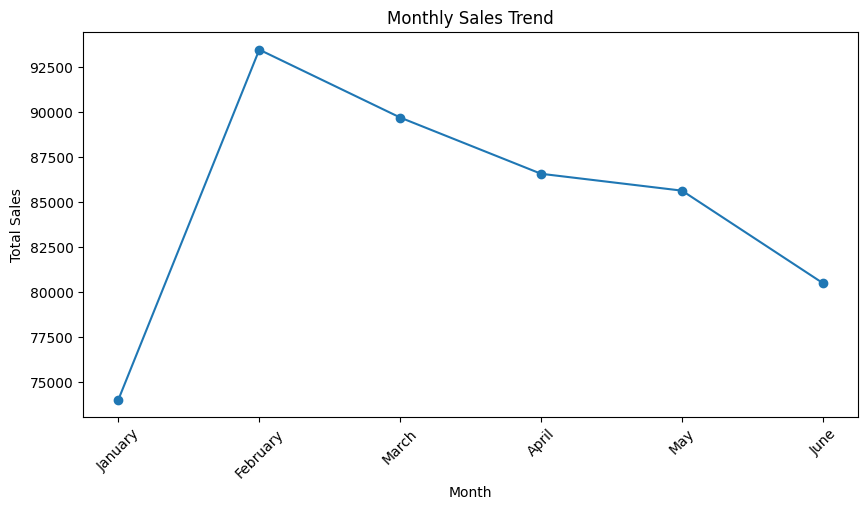

In [8]:
monthly_sales = (
    df.groupby(["Month_Num", "Month"])["Sales"]
    .sum()
    .reset_index()
    .sort_values("Month_Num")
)

plt.figure(figsize=(10,5))
plt.plot(monthly_sales["Month"], monthly_sales["Sales"], marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


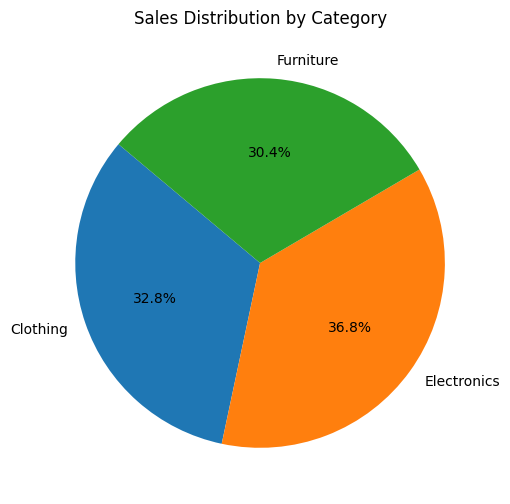

In [9]:
category_sales = df.groupby("Category")["Sales"].sum()

plt.figure(figsize=(6,6))
plt.pie(category_sales, labels=category_sales.index, autopct="%1.1f%%", startangle=140)
plt.title("Sales Distribution by Category")
plt.show()


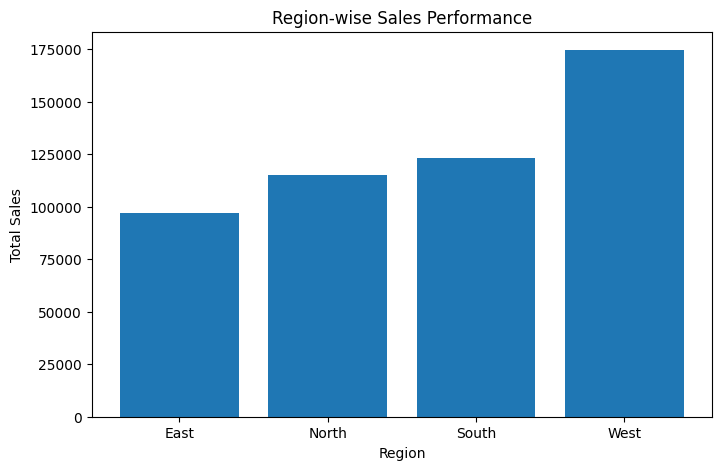

In [10]:
region_sales = df.groupby("Region")["Sales"].sum().reset_index()

plt.figure(figsize=(8,5))
plt.bar(region_sales["Region"], region_sales["Sales"])
plt.title("Region-wise Sales Performance")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()


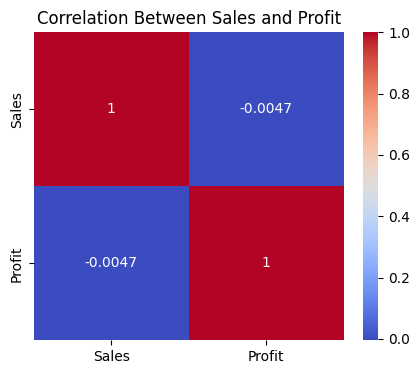

In [11]:
correlation = df[["Sales", "Profit"]].corr()

plt.figure(figsize=(5,4))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Between Sales and Profit")
plt.show()


In [12]:
print("FINAL BUSINESS INSIGHTS")
print("-" * 30)
print(f"Total Sales: {df['Sales'].sum()}")
print(f"Total Profit: {df['Profit'].sum()}")

top_product = df.groupby("Product")["Sales"].sum().idxmax()
top_region = df.groupby("Region")["Sales"].sum().idxmax()

print(f"Top Selling Product: {top_product}")
print(f"Best Performing Region: {top_region}")
print("Sales and profit show a positive correlation, indicating healthy business growth.")


FINAL BUSINESS INSIGHTS
------------------------------
Total Sales: 509908
Total Profit: 187307
Top Selling Product: Phone
Best Performing Region: West
Sales and profit show a positive correlation, indicating healthy business growth.
